### Exploratory Data Analysis

In this file, we will dig into the wildfire incident data further using:

- bar charts to observe trends over time
- scatterplots to look for relationships in the data
- investigations of outliers

In [28]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [29]:
fires_df_clean = pd.read_csv('./claire_data/fires_compiled.csv')
acres_df_clean = pd.read_csv('./claire_data/acres_clean.csv')


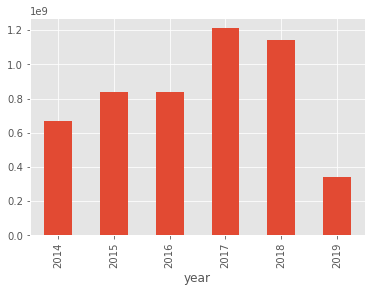

In [30]:
fires_df_clean.groupby('year')['Costs'].sum().plot(kind='bar');

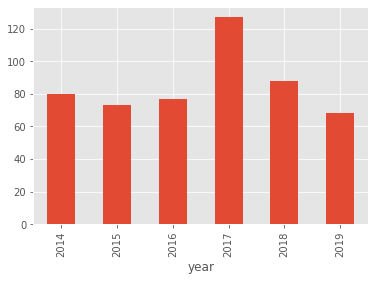

In [31]:
fires_df_clean.groupby('year')['Incident Number'].count().plot(kind='bar');

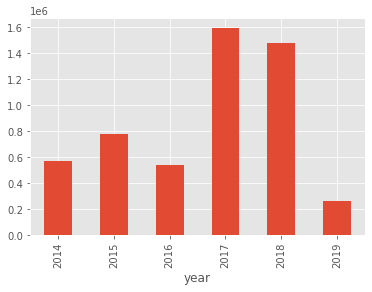

In [32]:
fires_df_clean.groupby('year')['Size'].sum().plot(kind='bar');

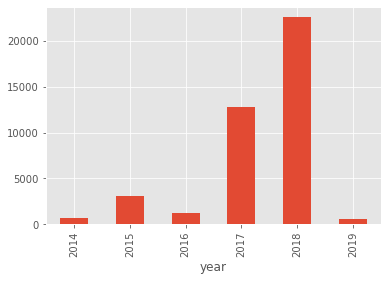

In [33]:
fires_df_clean.groupby('year')['Structures Destroyed'].sum().plot(kind='bar');

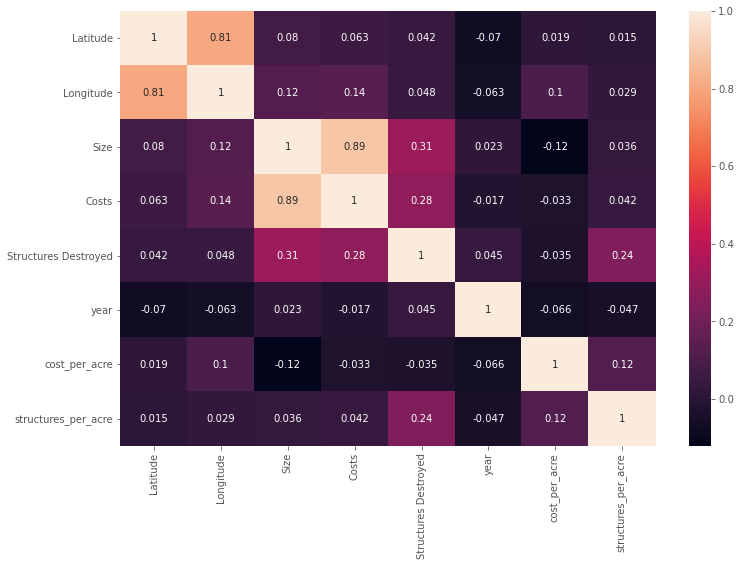

In [35]:
plt.subplots(figsize=(12,8))
sns.heatmap(fires_df_clean.corr(), annot=True);

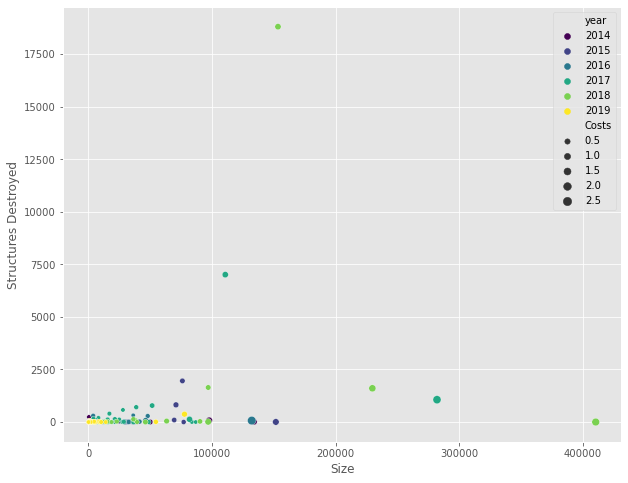

In [36]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Size', 
                y = 'Structures Destroyed', 
                data = fires_df_clean, 
                size= 'Costs',
                hue='year',
                palette='viridis')
plt.legend(loc='best');

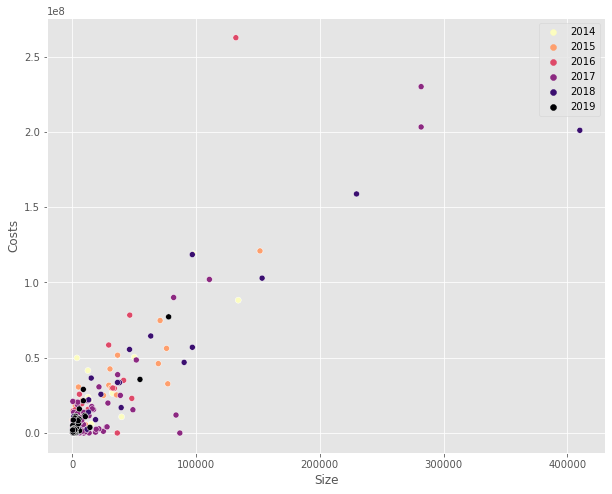

In [37]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Size', 
                y = 'Costs', 
                data = fires_df_clean, 
                hue='year',
                palette='magma_r')
plt.legend(loc='best');

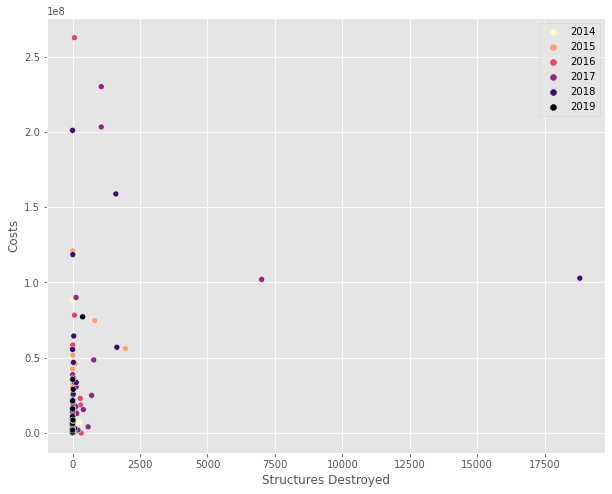

In [38]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Structures Destroyed', 
                y = 'Costs', 
                data = fires_df_clean, 
                hue='year',
                palette='magma_r')
plt.legend(loc='best');

In [39]:
fires_df_clean.sort_values(by='Structures Destroyed', ascending=False).head()

Incident Number        Incident Name Incident Type  Latitude  Longitude  \
386   CA-BTU-016737                 CAMP            WF        40        121   
249   CA-LNU-010104  CENTRAL LNU COMPLEX            WF        38        123   
92    CA-LNU-008670               VALLEY            WF        39        123   
434   CA-VNC-091023              WOOLSEY            WF        34        119   
382   CA-WNP-001084                 CARR            WF        41        123   

         Size Unit of Measure        Costs  Structures Destroyed  \
386  153336.0           Acres  102843527.0                 18804   
249  110720.0           Acres  102000000.0                  7010   
92    76067.0           Acres   56220000.0                  1958   
434   96949.0           Acres   56943320.0                  1643   
382  229651.0           Acres  158744844.0                  1604   

               Fire Name  start_date  year    county  cost_per_acre  \
386                 CAMP  2018-11-08  2018    Plumas     670.706990   
249  CENTRAL LNU COMPLEX  2017-10-09  2017     Marin     921.242775   
92                VALLEY  2015-09-12  2015      Lake     739.085280   
434              WOOLSEY  2018-11-08  2018   Ventura     587.353351   
382                 CARR  2018-07-23  2018  Siskiyou     691.243861   

     structures_per_acre  
386             0.122633  
249             0.063313  
92              0.025740  
434             0.016947  
382             0.006985

In [42]:
fires_df_clean.groupby('year')['cost_per_acre'].mean()

year
2014    3211.952170
2015    4440.627015
2016    2915.198240
2017    2670.354458
2018    2832.880773
2019    2681.698553
Name: cost_per_acre, dtype: float64

In [43]:
# Calculating a mean value to be used for predictions
fires_df_clean['cost_per_acre'].mean()

3072.858159768552

In [44]:
fires_df_clean['structures_per_acre'].describe()

count    513.000000
mean       0.004719
std        0.026054
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000515
max        0.463178
Name: structures_per_acre, dtype: float64

In [45]:
fires_df_clean['structures_per_acre'].mean()

0.004719401059238755